In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('QSales.csv')

In [22]:
data.index = data.index + 1

In [23]:
data.head()

,Quarter,Sales
1,1,680
2,2,600
3,3,745
4,4,925
5,5,920


In [24]:
data.index

RangeIndex(start=1, stop=19, step=1)

In [5]:
data.shape

(18, 2)

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

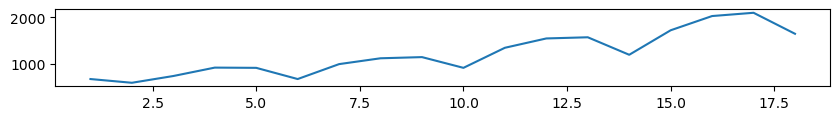

In [25]:
plt.figure(figsize=(10,1))
plt.plot(data['Quarter'], data['Sales'])
plt.show()

In [28]:
result = seasonal_decompose(data['Sales'],period=3)

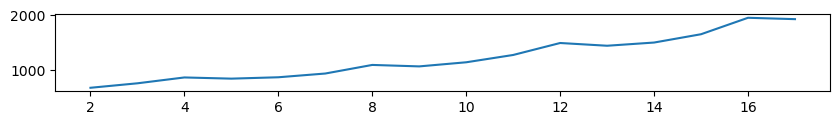

In [29]:
plt.figure(figsize=(10,1))
plt.plot(result.trend)
plt.show()

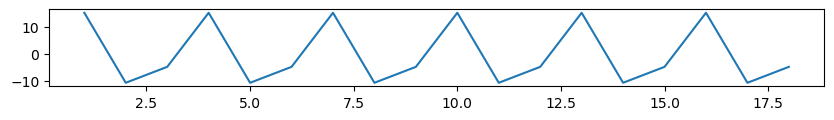

In [30]:
plt.figure(figsize=(10,1))
plt.plot(result.seasonal)
plt.show()

In [31]:
result

In [32]:
result.trend

1             NaN
2      675.000000
3      756.666667
4      863.333333
5      841.666667
6      866.666667
7      935.000000
8     1091.666667
9     1065.000000
10    1140.000000
11    1273.333333
12    1491.666667
13    1441.666667
14    1500.000000
15    1651.666667
16    1951.666667
17    1926.666667
18            NaN
Name: trend, dtype: float64

In [33]:
result.seasonal

1     15.296296
2    -10.592593
3     -4.703704
4     15.296296
5    -10.592593
6     -4.703704
7     15.296296
8    -10.592593
9     -4.703704
10    15.296296
11   -10.592593
12    -4.703704
13    15.296296
14   -10.592593
15    -4.703704
16    15.296296
17   -10.592593
18    -4.703704
Name: seasonal, dtype: float64

In [39]:
import seaborn as sns
df_temp = data.copy()
df_temp['Year'] = [2000,2000,2000,2000, 2001,2001, 2001,2001, 2002,2002, 2002,2002, 2003,2003,2003,2003, 2004,2004]
df_temp['NQ'] = [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2]
#plt.pointplot(x='Quarter',y='Sales',data=df_temp)

In [40]:
df_temp

,Quarter,Sales,Year,NQ
1,1,680,2000,1
2,2,600,2000,2
3,3,745,2000,3
4,4,925,2000,4
5,5,920,2001,1
6,6,680,2001,2
7,7,1000,2001,3
8,8,1125,2001,4
9,9,1150,2002,1
10,10,920,2002,2


<Axes: xlabel='NQ', ylabel='Sales'>

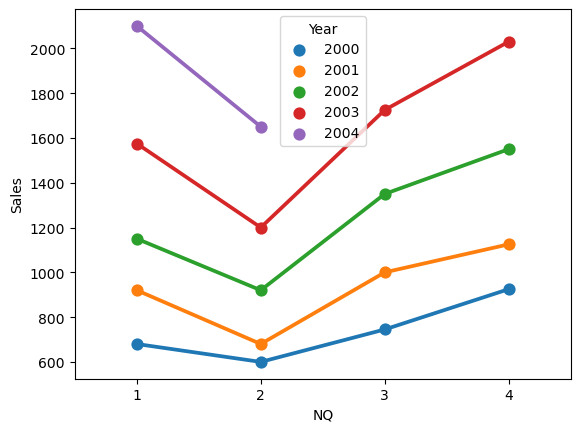

In [41]:
sns.pointplot(x='NQ',y='Sales',hue='Year', data=df_temp)

In [42]:
#ADF test
from statsmodels.tsa.stattools import adfuller


In [43]:
station_result = adfuller(data['Sales'])


In [45]:
station_result

(6.169039875055638,
 1.0,
 7,
 10,
 {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487},
 76.06516337894135)